In [109]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('dataset/adult.csv', na_values=['?'])

In [110]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [111]:
print(dataset['income'].value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [113]:
# find out what categories exist and how many people belong to each category
dataset['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [114]:
# show a summary of the numerical attributes
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


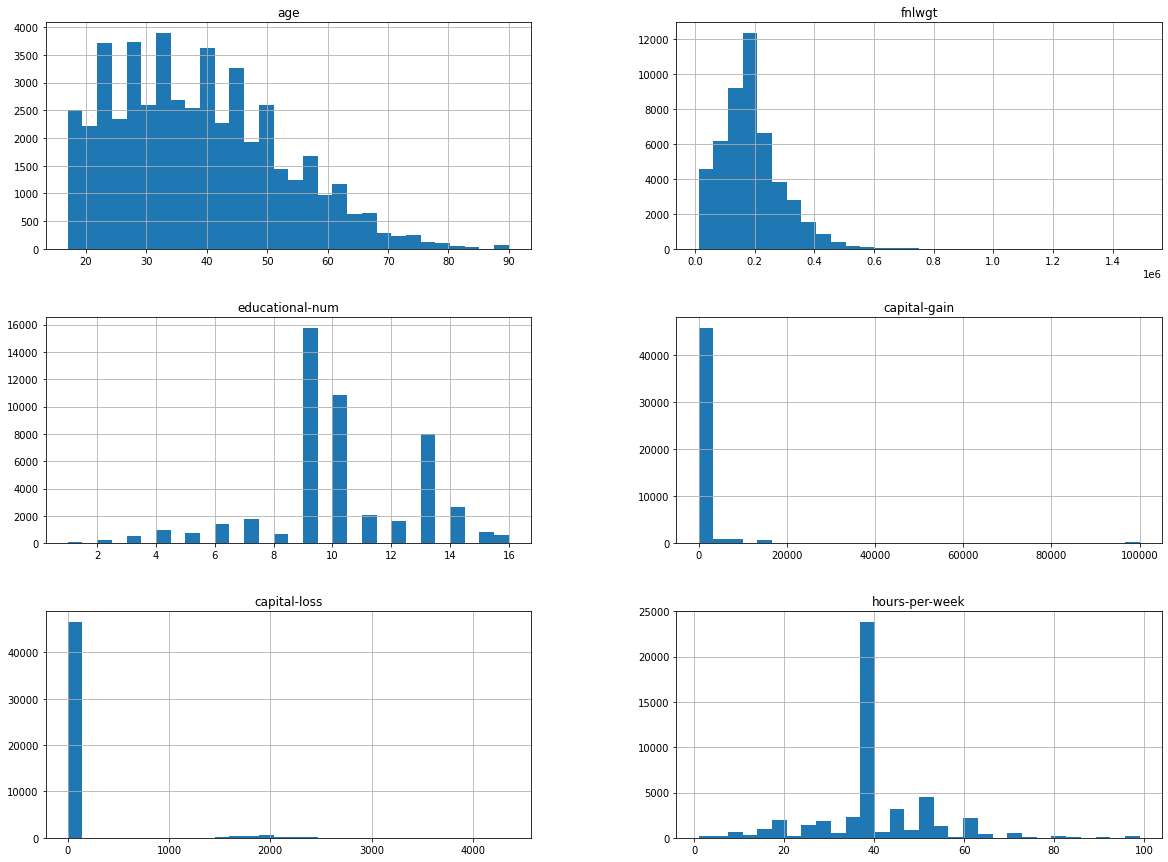

In [115]:
import matplotlib.pyplot as plt
dataset.hist(bins=30, figsize=(20,15))
plt.show()

In [116]:
# Looking for correlations to find two attributes that we can use
corr_matrix = dataset.corr()
corr_matrix['hours-per-week'].sort_values(ascending=False)

hours-per-week     1.000000
educational-num    0.143689
capital-gain       0.082157
age                0.071558
capital-loss       0.054467
fnlwgt            -0.013519
Name: hours-per-week, dtype: float64

In [117]:
corr_matrix['educational-num'].sort_values(ascending=False)

educational-num    1.000000
hours-per-week     0.143689
capital-gain       0.125146
capital-loss       0.080972
age                0.030940
fnlwgt            -0.038761
Name: educational-num, dtype: float64

<function scatter_matrix at 0x7f4106b46cb0>


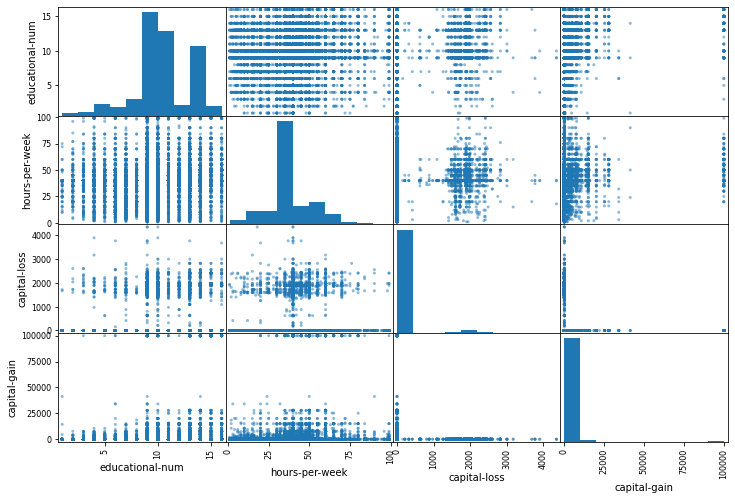

In [118]:
from pandas.plotting import scatter_matrix

attributes = ['educational-num', 'hours-per-week', 'capital-loss', 'capital-gain']
scatter_matrix(dataset[attributes], figsize=(12,8))
print(scatter_matrix)

In [119]:
# handling text and categorical attributes
income = dataset[['income']]
income.head(10)

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,<=50K
9,<=50K


In [120]:
dataset['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [140]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

income = dataset[['income']]
income_encoded = ordinal_encoder.fit_transform(income)
dataset.income = income_encoded

workclass = dataset[['workclass']]
workclass_encoded = ordinal_encoder.fit_transform(workclass)
dataset['workclass'] = workclass_encoded

ordinal_encoder = OrdinalEncoder()

education = dataset[['education']]
education_encoded = ordinal_encoder.fit_transform(education)
dataset['education'] = education_encoded

marital = dataset[['marital-status']]
marital_encoded = ordinal_encoder.fit_transform(marital)
dataset['marital-status'] = marital_encoded

occupation = dataset[['occupation']]
occupation_encoded = ordinal_encoder.fit_transform(occupation)
dataset['occupation'] = occupation_encoded

ordinal_encoder = OrdinalEncoder()

relationship = dataset[['relationship']]
relationship_encoded = ordinal_encoder.fit_transform(relationship)
dataset['relationship'] = occupation_encoded


dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3.0,226802,3.0,7,4.0,6.0,6.0,Black,Male,0,0,40,United-States,0.0
1,38,3.0,89814,3.0,9,2.0,4.0,4.0,White,Male,0,0,50,United-States,0.0
2,28,1.0,336951,1.0,12,2.0,10.0,10.0,White,Male,0,0,40,United-States,1.0
3,44,3.0,160323,3.0,10,2.0,6.0,6.0,Black,Male,7688,0,40,United-States,1.0
4,18,NaN,103497,NaN,10,4.0,NaN,NaN,White,Female,0,0,30,United-States,0.0


In [122]:
X = dataset.drop('income', 1)
y = dataset.income
type(y)

/tmp/ipykernel_11965/1781257793.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop('income', 1)


pandas.core.series.Series

In [123]:
# missing values we have
X.isnull().sum().sort_values(ascending=False).head()

occupation        2809
workclass         2799
native-country     857
age                  0
fnlwgt               0
dtype: int64

In [127]:
# inpute missing values using Imputer
from sklearn.impute import Imputer

imp = Imputer(missing_value='NaN', strategy='median', axis=0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X), column=X.colums)

ImportError: cannot import name 'Imputer' from 'sklearn.impute' (/usr/local/lib/python3.10/dist-packages/sklearn/impute/__init__.py)